# Data analysis for AcousticBrainz dataset from the perspective of music recommendation systems

In [1]:
# import os, sys
# import pandas as pd
# from pathlib import Path
# from concurrent.futures import ThreadPoolExecutor
# from track_processing_helpers import process_file

# # Create cache dir if needed
# CACHE = Path("cache"); CACHE.mkdir(exist_ok=True)

# # Read from cache to prevent costly rebuild
# if Path("cache/tracks.pkl").exists():
#     df = pd.read_pickle("cache/tracks.pkl")
# else:
#     dataset_path = "sample/"
#     json_paths = []

#     for root, dirs, files in os.walk(dataset_path):
#         for name in files:
#             if name.lower().endswith(".json"):
#                 json_paths.append(os.path.join(root, name))
#             else:
#                 print(f"Non-JSON file skipped: {name}")

#     print(len(json_paths))

#     #json_paths = json_paths[0:100]

#     rows = []
#     with ThreadPoolExecutor(max_workers=8) as executor:
#         futures = [executor.submit(process_file, path) for path in json_paths]
#         for future in futures:
#             result = future.result()
#             if not result:
#                 continue
            
#             rows.append(result)

#     df = pd.DataFrame(rows)
#     df.to_pickle("cache/tracks.pkl")

# df.drop(['file_path'], axis=1, inplace=True)
# df.head()

In [2]:
# df.info()

# df.describe()

In [3]:
# df.groupby('musicbrainz_recordingid')

Display genre distribution charts for 2 classifiers: Dortmund and Rosamerica

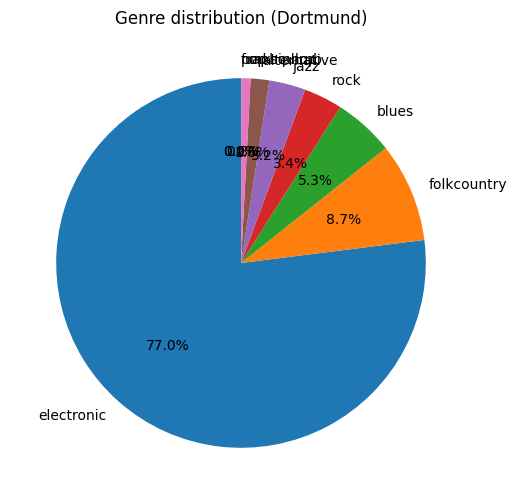

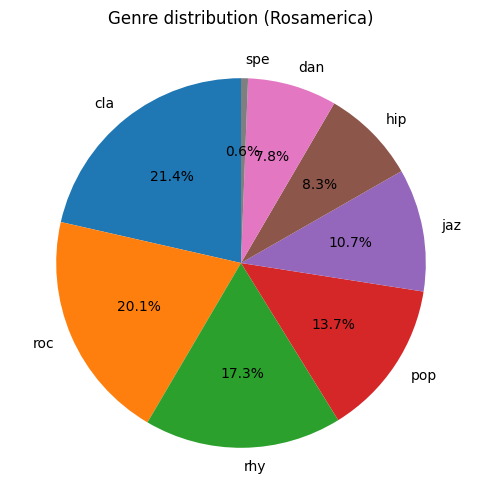

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.load("../features_and_index.npz", allow_pickle=True)

# Pull genres into a pandas Series
dort = pd.Series(data["genre_dortmund"])
rosa = pd.Series(data["genre_rosamerica"])

# Count and plot Dortmund
counts_dort = dort.value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts_dort, labels=counts_dort.index, autopct="%1.1f%%", startangle=90)
plt.title("Genre distribution (Dortmund)")
plt.show()

# Count and plot Rosamerica
counts_rosa = rosa.value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts_rosa, labels=counts_rosa.index, autopct="%1.1f%%", startangle=90)
plt.title("Genre distribution (Rosamerica)")
plt.show()

Count tracks with missing year information

In [5]:
years = np.array(data["years"])
num_tracks = len(years)
zero_years = np.sum(years == 0)

print(f"Missing year info: {zero_years}/{num_tracks}")

Missing year info: 163350/1921455


In [6]:
print(data["feature_names"])

['danceability' 'aggressiveness' 'happiness' 'sadness' 'relaxedness'
 'partyness' 'acousticness' 'electronicness' 'instrumentalness' 'tonality'
 'brightness' 'moods_mirex_1' 'moods_mirex_2' 'moods_mirex_3'
 'moods_mirex_4' 'moods_mirex_5']


In [10]:
features = [1, 2, 3, 4, 5, 6]
feature_names = ['a', 'b', 'c', 'd', 'e', 'f']

response_dict = {}
for i, feature in enumerate(features):
    response_dict[feature_names[i]] = feature

response_dict

feature_matrix = data["feature_matrix"]
feature_matrix

array([[ 0.01712041, -0.20396157, -0.31041348, ...,  0.171974  ,
        -0.28549224,  0.19308676],
       [ 0.30790752, -0.11953452, -0.06373665, ..., -0.08938294,
        -0.3165594 ,  0.3780663 ],
       [-0.19973117, -0.17447817, -0.13654196, ...,  0.18899398,
         0.03843713, -0.16812344],
       ...,
       [-0.08104603, -0.14280128,  0.42667538, ..., -0.14684667,
         0.2048347 , -0.24132559],
       [-0.21933341,  0.4410353 , -0.27599937, ..., -0.03097367,
        -0.25537506,  0.25197938],
       [ 0.24575017,  0.09155225, -0.07573276, ..., -0.11438923,
        -0.01127707, -0.19673662]], shape=(1921455, 16), dtype=float32)